## Importing Library

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Data

In [2]:
df= pd.read_csv('Market.csv')

In [3]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## EDA

<AxesSubplot:xlabel='Satisfaction', ylabel='Loyalty'>

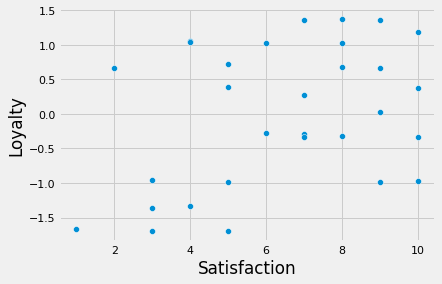

In [5]:
sns.scatterplot(df['Satisfaction'],df['Loyalty'])

## Model

In [7]:
x = df.copy()

In [8]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2)

In [9]:
km.fit(x)

KMeans(n_clusters=2)

In [13]:
df_new= df.copy()
cluster= km.predict(x)
df_new['cluster']=cluster
df_new.head()

,Satisfaction,Loyalty,cluster
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


<AxesSubplot:xlabel='Satisfaction', ylabel='Loyalty'>

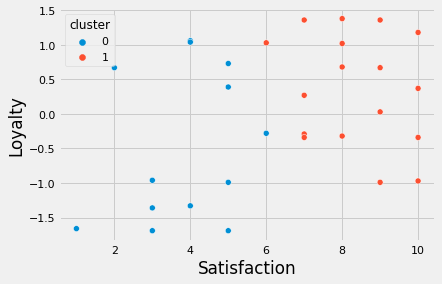

In [14]:
sns.scatterplot(df_new['Satisfaction'],df_new['Loyalty'],hue=df_new['cluster'])

## Standerdize

In [15]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [16]:
x= sc.fit_transform(x)

In [17]:
km.fit(x)

KMeans(n_clusters=2)

In [18]:
df_new['cluster']=km.predict(x)
df_new.head()

,Satisfaction,Loyalty,cluster
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0


<AxesSubplot:xlabel='Satisfaction', ylabel='Loyalty'>

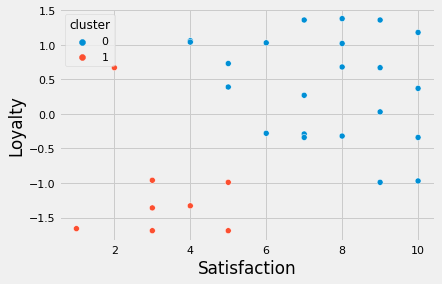

In [19]:
sns.scatterplot(df_new['Satisfaction'],df_new['Loyalty'],hue=df_new['cluster'])

## **Determining K**

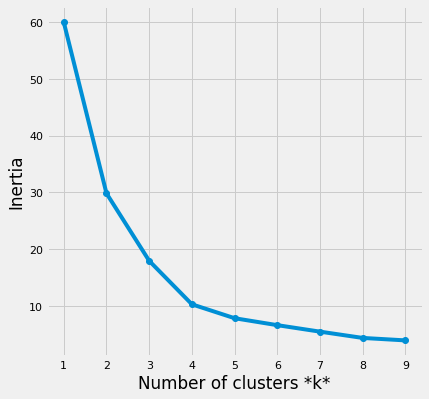

In [22]:
inertias = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

## Clustering K=4

In [24]:
km= KMeans(n_clusters=4)

In [25]:
km.fit(x)

KMeans(n_clusters=4)

In [26]:
df_new['cluster']=km.predict(x)
df_new.head()

,Satisfaction,Loyalty,cluster
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


<AxesSubplot:xlabel='Satisfaction', ylabel='Loyalty'>

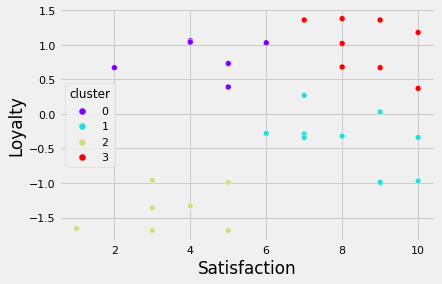

In [28]:
sns.scatterplot(df_new['Satisfaction'],df_new['Loyalty'],hue=df_new['cluster'],palette='rainbow')